In [1]:
import pandas as pd

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [3]:
data = pd.read_csv('F:\\mlspec\\ridge\\kc_house_data.csv',dtype=dtype_dict)

In [4]:
import numpy as np

In [5]:
def get_numpy_data(data, features, output):
    data['constant'] = 1
    features = ['constant'] + features
    featuredata = data[features]
    feature_matrix = featuredata.as_matrix()
    out = data[output]
    output_array = out.as_matrix()
    return(feature_matrix, output_array)

In [7]:
def predict_output(feature_matrix, weights):
    predictions = np.dot(feature_matrix,weights)
    return(predictions)

In [8]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    derivative = 2*np.dot(errors,feature)
    if not feature_is_constant:
        derivative=derivative+(2*l2_penalty*weight)
    return derivative

In [9]:
(example_features, example_output) = get_numpy_data(data, ['sqft_living'], 'price')
my_weights = np.array([1., 10.])
test_predictions = predict_output(example_features, my_weights)
errors = test_predictions - example_output # prediction errors

In [10]:
print feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False)
print np.sum(errors*example_features[:,1])*2+20.
print ''


-5.6554166816e+13
-5.6554166816e+13



In [11]:
print feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True)
print np.sum(errors)*2

-22446749330.0
-22446749330.0


In [18]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    weights = np.array(initial_weights) # make sure it's a numpy array
        #while not reached maximum number of iterations:
        # compute the predictions using your predict_output() function
    count = 1
    while count<=100:
        predictions=predict_output(feature_matrix,weights)
        errors=predictions-output
        # compute the errors as predictions - output
        for i in xrange(len(weights)): # loop over each weight
            # Recall that feature_matrix[:,i] is the feature column associated with weights[i]
            # compute the derivative for weight[i].
            #(Remember: when i=0, you are computing the derivative of the constant!)
            if i==0:
                derivative=feature_derivative_ridge(errors,feature_matrix[:,i],weights[i],l2_penalty,True)
            else:
                derivative=feature_derivative_ridge(errors,feature_matrix[:,i],weights[i],l2_penalty,False)
            # subtract the step size times the derivative from the current weight  
            weights[i]=weights[i]-(step_size*derivative)
        count=count+1
    return weights

In [13]:
train = pd.read_csv('F:\\mlspec\\ridge\\kc_house_train_data.csv',dtype=dtype_dict)

In [14]:
test = pd.read_csv('F:\\mlspec\\ridge\\kc_house_test_data.csv',dtype=dtype_dict)

In [19]:
simple_features = ['sqft_living']
my_output = 'price'
(simple_feature_matrix, output) = get_numpy_data(train, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test, simple_features, my_output)

In [16]:
initial_weights = np.array([0., 0.])
step_size = 1e-12
max_iterations=1000

In [20]:
simple_weights_0_penalty=ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size,0.0, max_iterations)

In [22]:
simple_weights_0_penalty

array([  7.88199705e-02,   2.63024271e+02])

In [68]:
simple_weights_high_penalty=ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size,1e11, max_iterations)
simple_weights_high_penalty

ValueError: shapes (17384,2) and (3,) not aligned: 2 (dim 1) != 3 (dim 0)

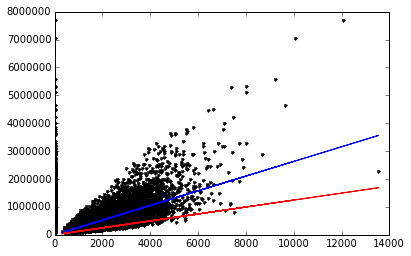

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(simple_feature_matrix,output,'k.',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_high_penalty),'r-')

In [25]:
simple_weights_high_penalty

array([   0.99807924,  124.57384476])

In [31]:
predict_0=predict_output(simple_test_feature_matrix,np.array([0.,0.]))

In [32]:
rss_0=sum((test_output-predict_0)**2)

In [33]:
rss_0

1784273286136298.0

In [41]:
predict_low=predict_output(simple_test_feature_matrix,simple_weights_0_penalty)

In [42]:
rss_low=sum((test_output-predict_low)**2)

In [43]:
rss_low

275723641491223.03

In [44]:
predict_high=predict_output(simple_test_feature_matrix,simple_weights_high_penalty)

In [45]:
rss_high=sum((test_output-predict_high)**2)

In [46]:
rss_high

694653090427465.75

In [74]:
model_features = ['sqft_living', 'sqft_living15']
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(test, model_features, my_output)

In [75]:
initial_weights = np.array([0.0,0.0,0.0])
step_size = 1e-12
max_iterations = 1000

In [76]:
multiple_weights_0_penalty=ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size,0.0, 1000)

In [77]:
multiple_weights_high_penalty=ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size,1e11, 1000)

In [78]:
multiple_weights_0_penalty

array([  1.80292394e-03,   1.87808775e+02,   8.24046821e+01])

In [79]:
multiple_weights_high_penalty

array([  0.69480859,  91.4900809 ,  78.43740304])

In [54]:
predict_0=predict_output(test_feature_matrix,np.array([0.,0.,0.]))

In [55]:
rss_0=sum((test_output-predict_0)**2)

In [56]:
rss_0

1784273286136298.0

In [57]:
predict_no=predict_output(test_feature_matrix,multiple_weights_0_penalty)

In [58]:
rss_no=sum((test_output-predict_no)**2)

In [59]:
rss_no

276002294253496.09

In [60]:
predict_high=predict_output(test_feature_matrix,multiple_weights_high_penalty)

In [61]:
rss_high=sum((test_output-predict_high)**2)

In [62]:
rss_high

500408149935772.87

In [63]:
test_output[0]

310000.0

In [64]:
predict_no[0]

415246.88440829352

In [65]:
predict_high[0]

270450.08791268896

In [66]:
(test_output[0]-predict_no[0])**2

11076906677.652699

In [72]:
(test_output[0]-predict_high[0])**2

1564195546.1140316

In [69]:
simple_weights_high_penalty

array([   0.99807924,  124.57384476])

In [70]:
test_output[0]-predict_no[0]

-105246.88440829352

In [71]:
test_output[0]-predict_high[0]

39549.912087311037

In [73]:
(test_output[0]-predict_no[0])**2<(test_output[0]-predict_high[0])**2

False